In [9]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import precision_recall_fscore_support, classification_report


if __name__ == "__main__":
    y_true = np.array([1, 1, 1, 1, 0, 0])
    y_hat = np.array([1, 0, 1, 1, 0, 0])
    print 'Accuracy：\t', accuracy_score(y_true, y_hat)

    # The precision is the ratio 'tp / (tp + fp)' where 'tp' is the number of
    # true positives and 'fp' the number of false positives. The precision is
    # intuitively the ability of the classifier not to label as positive a sample
    # that is negative.
    # The best value is 1 and the worst value is 0.
    precision = precision_score(y_true, y_hat)
    print 'Precision:\t', precision

    # The recall is the ratio 'tp / (tp + fn)' where 'tp' is the number of
    # true positives and 'fn' the number of false negatives. The recall is
    # intuitively the ability of the classifier to find all the positive samples.
    # The best value is 1 and the worst value is 0.
    recall = recall_score(y_true, y_hat)
    print 'Recall:  \t', recall

    # F1 score, also known as balanced F-score or F-measure
    # The F1 score can be interpreted as a weighted average of the precision and
    # recall, where an F1 score reaches its best value at 1 and worst score at 0.
    # The relative contribution of precision and recall to the F1 score are
    # equal. The formula for the F1 score is:
    #     F1 = 2 * (precision * recall) / (precision + recall)
    print 'f1 score: \t', f1_score(y_true, y_hat)
    print 2 * (precision * recall) / (precision + recall)

    # The F-beta score is the weighted harmonic mean of precision and recall,
    # reaching its optimal value at 1 and its worst value at 0.
    # The 'beta' parameter determines the weight of precision in the combined
    # score. 'beta < 1' lends more weight to precision, while 'beta > 1'
    # favors recall ('beta -> 0' considers only precision, 'beta -> inf' only recall).
    print 'F-beta：'
    for beta in np.logspace(-3, 3, num=7, base=10):
        fbeta = fbeta_score(y_true, y_hat, beta=beta)
        print '\tbeta=%9.3f\tF-beta=%.5f' % (beta, fbeta)
        #print (1+beta**2)*precision*recall / (beta**2 * precision + recall)

Accuracy：	0.833333333333
Precision:	1.0
Recall:  	0.75
f1 score: 	0.857142857143
0.857142857143
F-beta：
	beta=    0.001	F-beta=1.00000
	beta=    0.010	F-beta=0.99997
	beta=    0.100	F-beta=0.99671
	beta=    1.000	F-beta=0.85714
	beta=   10.000	F-beta=0.75186
	beta=  100.000	F-beta=0.75002
	beta= 1000.000	F-beta=0.75000


In [10]:
print precision_recall_fscore_support(y_true, y_hat, beta=1)

(array([ 0.66666667,  1.        ]), array([ 1.  ,  0.75]), array([ 0.8       ,  0.85714286]), array([2, 4], dtype=int64))


In [8]:
print classification_report(y_true, y_hat)

             precision    recall  f1-score   support

          0       0.50      0.50      0.50         2
          1       0.75      0.75      0.75         4

avg / total       0.67      0.67      0.67         6



1 次：
正确率：	0.99
 精度 ：	0.0
召回率：	0.0
F1-score：	0.0

2 次：
正确率：	0.94
 精度 ：	0.142857142857
召回率：	1.0
F1-score：	0.25

3 次：
正确率：	0.994
 精度 ：	0.625
召回率：	1.0
F1-score：	0.769230769231

4 次：
正确率：	0.994
 精度 ：	0.625
召回率：	1.0
F1-score：	0.769230769231



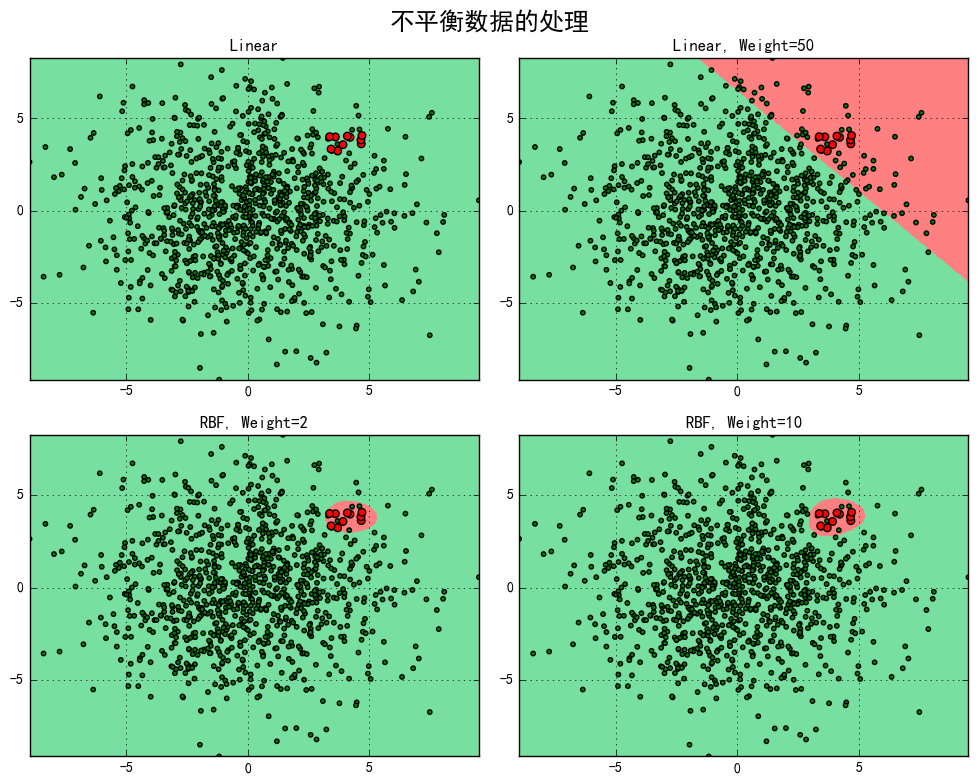

In [11]:

import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
import warnings


def show_accuracy(a, b):
    acc = a.ravel() == b.ravel()
    print '正确率：%.2f%%' % (100*float(acc.sum()) / a.size)


def show_recall(y, y_hat):
    # print y_hat[y == 1]
    print '召回率：%.2f%%' % (100 * float(np.sum(y_hat[y == 1] == 1)) / np.extract(y == 1, y).size)


if __name__ == "__main__":
    warnings.filterwarnings("ignore")   # UndefinedMetricWarning
    np.random.seed(0)   # 保持每次生成的数据相同

    c1 = 990
    c2 = 10
    N = c1 + c2
    x_c1 = 3*np.random.randn(c1, 2)
    x_c2 = 0.5*np.random.randn(c2, 2) + (4, 4)
    x = np.vstack((x_c1, x_c2))
    y = np.ones(N)
    y[:c1] = -1

    # 显示大小
    s = np.ones(N) * 30
    s[:c1] = 10

    # 分类器
    clfs = [svm.SVC(C=1, kernel='linear'),
           svm.SVC(C=1, kernel='linear', class_weight={-1: 1, 1: 50}),
           svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 2}),
           svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 10})]
    titles = 'Linear', 'Linear, Weight=50', 'RBF, Weight=2', 'RBF, Weight=10'

    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # 生成网格采样点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    cm_light = matplotlib.colors.ListedColormap(['#77E0A0', '#FF8080'])
    cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])
    matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10, 8), facecolor='w')
    for i, clf in enumerate(clfs):
        clf.fit(x, y)

        y_hat = clf.predict(x)
        # show_accuracy(y_hat, y) # 正确率
        # show_recall(y, y_hat)   # 召回率
        print i+1, '次：'
        print '正确率：\t', accuracy_score(y, y_hat)
        print ' 精度 ：\t', precision_score(y, y_hat, pos_label=1)
        print '召回率：\t', recall_score(y, y_hat, pos_label=1)
        print 'F1-score：\t', f1_score(y, y_hat, pos_label=1)
        print


        # 画图
        plt.subplot(2, 2, i+1)
        grid_hat = clf.predict(grid_test)       # 预测分类值
        grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
        plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
        plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=s, cmap=cm_dark)      # 样本的显示
        plt.xlim(x1_min, x1_max)
        plt.ylim(x2_min, x2_max)
        plt.title(titles[i])
        plt.grid()
    plt.suptitle(u'不平衡数据的处理', fontsize=18)
    plt.tight_layout(1.5)
    plt.subplots_adjust(top=0.92)
    plt.show()

In [19]:
s

array([ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  1